*Contenuti*
===
- [Introduzione](#Introduzione)
    - [Il docente](#Il-docente)
    - [Scopo di queste lezioni](#Scopo-di-queste-lezioni)
- [Il dataset OPSD](#Il-dataset-OPSD)
- [Indicizzazione temporale](#Indicizzazione-temporale)
    - [*to_datetime* e *Timestamp*](#to_datetime-e-Timestamp)
    - [*DatetimeIndex* e sue proprietà](#DatetimeIndex-e-sue-proprietà)
    - [Caricamento indicizzato](#Caricamento-indicizzato)
    - [String e partial-string indexing](#String-e-partial-string-indexing)
    - [Esercizio 1.1](#Esercizio-1.1)
- [Serie temporali](#Serie-temporali)
    - [Analysis vs forecast](#Analysis-vs-forecast)
    - [Serie univariate e multivariate](#Serie-univariate-e-multivariate)
    - [Serie even e uneven; gestione della frequenza](#Serie-even-e-uneven;-gestione-della-frequenza)
- [Visualizzazione di serie temporali](#Visualizzazione-di-serie-temporali)
    - [Matplotlib e Seaborn](#Matplotlib-e-Seaborn)
    - [Esempi di plot](#Esempi-di-plot)
    - [Plot multipli](#Plot-multipli)
- [Analisi della stagionalità](#Analisi-della-stagionalità)
    - [Esercizio 1.2](#Esercizio-1.2)
    - [*groupby*](#groupby)
    - [Boxplots](#Boxplots)
    - [Esercizio 1.3](#Esercizio-1.3)

Introduzione
===

Il docente
---
Mi chiamo <a href="https://www.linkedin.com/in/francescobagattini/">Francesco Bagattini</a> e sono un docente e consulente freelancer in ambito data science. Mi occupo di *trasferimento tecnologico*: aiuto le piccole e medie imprese a sviluppare soluzioni data-driven basate su AI.

Scopo di queste lezioni
---
In queste due giornate vedremo un tipo particolare di dati: le **time series**. Partiamo da una definizione semplice che riprenderemo a breve.

<h3><center><i>Una serie temporale è una sequenza di dati osservati sequenzialmente.</i></center></h3>

In pratica, qualsiasi quantità che varia nel tempo è una time series. Alcuni esempi:

- temperatura minima giornaliera
- numero di vendite di un prodotto
- tasso di inquinamento dell'aria
- produzione e consumo di energia
- traffico su un portale web
- ...numero di contagi della vostra pandemia preferita.

<h3><center><i>~</i></center></h3>

Iniziamo con un esempio concreto di time series. Usiamo strumenti noti e nuovi di Pandas, Matplotlib e Seaborn per studiarne la struttura temporale.

Questi strumenti ci serviranno per capire quali sono i mattoni che costituiscono una serie temporale.

Una volta in grado di **analizzare una time series**, useremo le informazioni che abbiamo estrapolato per cercare di **predire il suo futuro**.

Qua e là, ragioneremo sulle differenze tra queste tecniche e l'apprendimento supervisionato classico. 

In [1]:
import pandas as pd

Abbiamo importato **Pandas**, la libreria Python di manipolazione dati. La sfrutteremo per analizzare dati di consumo elettrico.

Il dataset OPSD
---

<img src='img/OPSD.png' width=250/>

<br>

Il dataset **OPSD_Germany_consumption** riporta il consumo elettrico totale tedesco (in GWh) dal 2006 al 2017. Questi dati fanno parte del progetto OPSD: https://open-power-system-data.org/.



Iniziamo caricando il dataset in formato *DataFrame*, la struttura dati base di Pandas. L'unico argomento obbligatorio della funzione *read_csv* è il path del file .csv che vogliamo caricare. Le funzioni *head* e *tail* mostrano rispettivamente i primi e ultimi record (5 di default) del dataframe.

In [2]:
df = pd.read_csv('../data/OPSD_Germany_consumption.csv')
df.head()

,Date,Consumption
0,2006-01-01,1069.184
1,2006-01-02,1380.521
2,2006-01-03,1442.533
3,2006-01-04,1457.217
4,2006-01-05,1477.131


In [3]:
df.tail()

,Date,Consumption
4378,2017-12-27,1263.94091
4379,2017-12-28,1299.86398
4380,2017-12-29,1295.08753
4381,2017-12-30,1215.44897
4382,2017-12-31,1107.11488


In [4]:
df.shape

(4383, 2)

Pandas eredita la funzione *shape* da NumPy. Il dataframe contiene 4383 record: per ogni riga, oltre all'informazione di consumo, è disponibile la data a cui essa fa riferimento.

Pandas, all'atto del caricamento, dota il dataframe di una struttura di indici. Attraverso la sintassi

        df.loc[position]
        
è possibile accedere all'elemento che si trova all'indice *position*.

In [5]:
df.loc[3]

Date           2006-01-04
Consumption       1457.22
Name: 3, dtype: object

Siamo abituati ad associare le colonne di un dataset alle *feature* di un problema di apprendimento. Consideriamo la colonna 'Date': è una feature speciale? Che ruolo può avere nel machine learning? 

Diamo un'occhiata al suo contenuto.

In [6]:
df['Date'].dtype

dtype('O')

In Pandas il tipo 'O' sta per *Object*: in generale, una stringa.

In [7]:
df['Date'].loc[0]

'2006-01-01'

Pandas ha caricato i record di questa colonna come semplici stringhe.

Indicizzazione temporale
===
Vogliamo associare ai record del dataframe una struttura temporale.

*to_datetime* e *Timestamp*
---
La funzione *to_datatime* di Pandas trasforma una stringa in un oggetto dotato di logica temporale.

In [8]:
pd.to_datetime('10-02-09')

Timestamp('2009-10-02 00:00:00')

La funzione ha provato a inferire autonomamente il formato della data: 2 ottobre 2009. Attraverso gli argomenti opzionali è possibile guidare la trasformazione.

In [9]:
pd.to_datetime('10-02-09', yearfirst=True)

Timestamp('2010-02-09 00:00:00')

In [10]:
pd.to_datetime('10-02-09', dayfirst=True)

Timestamp('2009-02-10 00:00:00')

La funzione gestisce formati diversi. 

In [11]:
pd.to_datetime('Jan 3 2019')

Timestamp('2019-01-03 00:00:00')

Oltre ad una singola stringa possiamo convertire liste di stringhe; ad esempio, possiamo trasformare l'intera colonna Date.

In [12]:
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Consumption
0,2006-01-01,1069.184
1,2006-01-02,1380.521
2,2006-01-03,1442.533
3,2006-01-04,1457.217
4,2006-01-05,1477.131


A prima vista non è cambiato niente. Controlliamo meglio: di che tipo è la colonna trasformata?

In [13]:
df.dtypes

Date           datetime64[ns]
Consumption           float64
dtype: object

Perché il tipo ha questo nome? Python considera gli oggetti temporali come interi a 64 bit, in modo tale da poter gestire la precisione fino al nanosecondo (ns).

**Recap**: abbiamo trasformato una colonna del dataframe in un tipo speciale, dotato di logica temporale.

*DatetimeIndex* e sue proprietà
---
Siamo interessati ad analizzare i consumi *nel tempo*. La colonna Date che abbiamo trasformato può essere usata come indice.

In [14]:
df.set_index('Date').head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


In [15]:
df.head()

,Date,Consumption
0,2006-01-01,1069.184
1,2006-01-02,1380.521
2,2006-01-03,1442.533
3,2006-01-04,1457.217
4,2006-01-05,1477.131


Perché non è cambiato niente nel dataframe? Dove abbiamo sbagliato?

Quasi tutte le funzioni Pandas restituiscono una copia dell'oggetto che costruiscono. Perché le modifiche abbiano effetto occorre sovrascrivere il dataframe di partenza (oppure assegnare il risultato ad un nuovo dataframe).

In [16]:
df = df.set_index('Date')

df.head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


Adesso df è correttamente indicizzato dalla colonna Date. Guardiamo come è fatto questo nuovo indice.

In [17]:
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

*DatetimeIndex* è un indice particolare di Pandas, con delle proprietà specifiche.

In [18]:
df.index.year

Int64Index([2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=4383)

In [19]:
df.index.day

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
            22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64', name='Date', length=4383)

**Recap**: abbiamo utilizzato l'informazione temporale presente nei dati (il giorno a cui è registrato il consumo di energia elettrica) come indice temporale del dataframe.

Caricamento indicizzato
---
Otteniamo quanto visto finora in modo compatto. Attraverso la funzione read_csv è possibile caricare il dataframe gestendo direttamente l'indicizzazione temporale.

Tra gli argomenti opzionali di read_csv troviamo:

- *parse_dates*
- *index_col*

che automatizzano quanto visto in precedenza.

In [20]:
df = pd.read_csv('../data/OPSD_Germany_consumption.csv',
                 parse_dates=True,
                 index_col='Date')
df.head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


**Nota**: ricordiamoci che è possibile accedere alla documentazione di una funzione attraverso la sequenza

    Shift Tab (Tab Tab)
    
eseguita col cursore posizionato accanto al nome della funzione. In alternativa, è possibile eseguire una cella del tipo
    
    nome_funzione?

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
dtypes: float64(1)
memory usage: 68.5 KB


**Recap**: con una sola funzione abbiamo caricato il dataset OPSD_Germany_consumption e imposto la colonna Date come indice temporale.

String e partial-string indexing
---

Adesso che ai record del dataframe è associato un riferimento temporale, possiamo accedervi in modo comodo attraverso lo *string indexing*.

Supponiamo di voler conoscere il consumo elettrico di Natale 2015.

In [22]:
df.loc['2015-12-25']

Consumption    1047.277
Name: 2015-12-25 00:00:00, dtype: float64

Resta valido l'automatismo nel riconoscimento dei vari formati di data.

In [23]:
df.loc['Dec 25 2015']

Consumption    1047.277
Name: 2015-12-25 00:00:00, dtype: float64

Supponiamo di voler confrontare questo dato con la sua media mensile. 

Lo string indexing può essere utilizzato in modo simile allo *slicing* Python e NumPy, attraverso i ':'.

In [24]:
df['2015-12-1':'2015-12-31']

,Consumption
Date,
2015-12-01,1588.021
2015-12-02,1585.308
2015-12-03,1577.457
2015-12-04,1570.318
2015-12-05,1337.095
2015-12-06,1232.073
2015-12-07,1536.251
2015-12-08,1572.740
2015-12-09,1586.393


Attenzione: in Pandas entrambi gli estremi di indicizzazione sono inclusi nel risultato.

Un'altra tecnica di indicizzazione temporale è il *partial-string indexing*. Specificando mese e anno, estraiamo i soli record di dicembre 2015.

In [25]:
df['2015-12']

,Consumption
Date,
2015-12-01,1588.021
2015-12-02,1585.308
2015-12-03,1577.457
2015-12-04,1570.318
2015-12-05,1337.095
2015-12-06,1232.073
2015-12-07,1536.251
2015-12-08,1572.740
2015-12-09,1586.393


Ed ecco il consumo medio di dicembre 2015.

In [26]:
df['2015-12'].mean()

Consumption    1375.545516
dtype: float64

**Recap**: abbiamo imparato come si accede agli elementi di un dataframe indicizzato temporalmente.

Esercizio 1.1
---

Il dataset **OPSD_Germany_all** contiene, oltre al consumo di energia elettrica, le produzioni giornaliere di energia eolica e solare.

Caricare il dataset in formato dataframe, usando la colonna *Date* come indice temporale. I dati di produzione di energia solare non sono disponibili fino al 31 dicembre 2011; selezionare, dal dataframe, solo i record posteriori a tale data.

Costruire la colonna *Renewable* come somma delle produzioni eolica e solare.

Calcolare il rapporto tra
    - a) la produzione rinnovabile totale di settembre 2014 e
    - b) il consumo elettrico totale dello stesso mese.
    
Sfruttando le proprietà dell'indice Date (**suggerimento**: *index.day_name()*), costruire la colonna 'Weekday' contenente, per ogni record, il giorno della settimana a cui è stato registrato (Monday, Tuesday, ...).

Costruire il dataframe *df_sunday_wind* contenente la produzione eolica delle sole domeniche.

Calcolare la produzione eolica media domenicale tra gennaio e marzo 2017 (inclusi).

---

Serie temporali
===

Analysis vs forecast
---

Ripartiamo dalla definizione di serie temporale.

<h3><center><i>Una serie temporale è una sequenza di dati osservati sequenzialmente.</i></center></h3>

Come interviene il concetto di tempo nel machine learning classico? Un modello, una volta addestrato, viene testato sui dati *futuri* via via disponibili. In generale, però, durante l'apprendimento i dati del training set vengono trattati tutti allo stesso modo; non vengono cioè ordinati temporalmente.

Rispetto ad un dataset classico di apprendimento una time series aggiunge dipendenza temporale tra i record.

Si parla di **analysis** quando siamo interessati a capire e descrivere una serie temporale di dati passati. Questa analisi non è necessariamente mirata alla predizione del futuro. Quando, viceversa, siamo interessati al futuro di una serie temporale (e sfruttiamo il suo passato per fare previsioni), stiamo facendo **forecast**.

Proseguiamo in questa lezione con l'analisi (quantitativa e grafica). Nella prossima, partiremo da quanto visto per fare previsioni future.

Serie univariate e multivariate
---

Una serie temporale si dice **univariata** se consiste di una sola variabile osservata sequenzialmente. Si pensi, ad esempio, alle vendite di un certo prodotto o alla temperatura minima giornaliera. Il dataset visto all'inizio della lezione è un esempio di serie univariata.

<img src='img/uni.png' width=500/>

In una serie **multivariata** più quantità variano nel tempo. Per esempio, un sistema fisico in cui è nota, in ogni istante, la velocità lungo i tre assi coordinati $x$, $y$ e $z$. Il dataset **OPSD_Germany_all** è una serie multivariata.

<img src='img/multi.png' width=500/>

Serie even e uneven; gestione della frequenza
---
Una serie temporale può avere frequenza fissa (giornaliera, settimanale, ...) o variabile (quando i suoi valori sono registrati in modo non regolare). Si parla rispettivamente di serie temporale *even* e *uneven*.

Le serie con cui abbiamo lavorato finora hanno frequenza fissa giornaliera.

Vediamo come Pandas gestisce la frequenza di una series. La funzione *date_range* permette di creare un indice temporale con una frequenza assegnata.

In [27]:
pd.date_range('2020-03-09', '2020-05-04', freq='D')

DatetimeIndex(['2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
               '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
      

In [28]:
pd.date_range('2020-03-09', '2020-05-04', freq='W')

DatetimeIndex(['2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05',
               '2020-04-12', '2020-04-19', '2020-04-26', '2020-05-03'],
              dtype='datetime64[ns]', freq='W-SUN')

In [29]:
pd.date_range('2020-03-09', '2020-05-04', freq='W-MON')

DatetimeIndex(['2020-03-09', '2020-03-16', '2020-03-23', '2020-03-30',
               '2020-04-06', '2020-04-13', '2020-04-20', '2020-04-27',
               '2020-05-04'],
              dtype='datetime64[ns]', freq='W-MON')

In [30]:
pd.date_range('2020-03-09', '2020-05-04', freq='1H')

DatetimeIndex(['2020-03-09 00:00:00', '2020-03-09 01:00:00',
               '2020-03-09 02:00:00', '2020-03-09 03:00:00',
               '2020-03-09 04:00:00', '2020-03-09 05:00:00',
               '2020-03-09 06:00:00', '2020-03-09 07:00:00',
               '2020-03-09 08:00:00', '2020-03-09 09:00:00',
               ...
               '2020-05-03 15:00:00', '2020-05-03 16:00:00',
               '2020-05-03 17:00:00', '2020-05-03 18:00:00',
               '2020-05-03 19:00:00', '2020-05-03 20:00:00',
               '2020-05-03 21:00:00', '2020-05-03 22:00:00',
               '2020-05-03 23:00:00', '2020-05-04 00:00:00'],
              dtype='datetime64[ns]', length=1345, freq='H')

In [31]:
pd.date_range(start='2020-03-09', freq='D', periods=60)

DatetimeIndex(['2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
               '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
               '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
               '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
               '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
               '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
               '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
               '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
               '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
               '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03',
      

Torniamo al nostro dataset di consumi.

In [32]:
df = pd.read_csv('../data/OPSD_Germany_consumption.csv',
                 parse_dates=True,
                 index_col='Date')

df.head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


In [33]:
df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

Quando Pandas carica dei dati da .csv l'informazione sulla frequenza non viene settata. Questo può essere fatto con la funzione *asfreq*.

In [34]:
df.asfreq('D').head()

,Consumption
Date,
2006-01-01,1069.184
2006-01-02,1380.521
2006-01-03,1442.533
2006-01-04,1457.217
2006-01-05,1477.131


In [35]:
df.asfreq('D').index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq='D')

Vediamo cosa succede se assegniamo la frequenza a un indice temporale che presenta dei buchi. 

In [36]:
some_days = pd.to_datetime(['2012-01-01', '2012-01-04', '2012-01-07'])

some_days

DatetimeIndex(['2012-01-01', '2012-01-04', '2012-01-07'], dtype='datetime64[ns]', freq=None)

In [37]:
df.loc[some_days]

,Consumption
2012-01-01,948.128
2012-01-04,1347.136
2012-01-07,1175.688


In [38]:
df.loc[some_days].asfreq('D')

,Consumption
2012-01-01,948.128
2012-01-02,NaN
2012-01-03,NaN
2012-01-04,1347.136
2012-01-05,NaN
2012-01-06,NaN
2012-01-07,1175.688


Gli argomenti della funzione asfreq permettono di scegliere come riempire i buchi.

In [39]:
df.loc[some_days].asfreq('D', method='ffill')

,Consumption
2012-01-01,948.128
2012-01-02,948.128
2012-01-03,948.128
2012-01-04,1347.136
2012-01-05,1347.136
2012-01-06,1347.136
2012-01-07,1175.688


In [40]:
df.loc[some_days].asfreq('D', fill_value=0)

,Consumption
2012-01-01,948.128
2012-01-02,0.000
2012-01-03,0.000
2012-01-04,1347.136
2012-01-05,0.000
2012-01-06,0.000
2012-01-07,1175.688


Al solito, possiamo consultare la documentazione senza uscire da Jupyter.

**Recap**: abbiamo introdotto la differenza tra analysis e forecast e definito alcune categorie di serie temporali. Inoltre, abbiamo imparato a trattare la frequenza di un dataframe Pandas indicizzato temporalmente.

Visualizzazione di serie temporali
===
Riprendiamo il dataset OPSD e iniziamo la fase di analisi con i principali strumenti di visualizzazione di Python.

Matplotlib e Seaborn
---

<a href="https://matplotlib.org/">Matplotlib</a> è una libreria altamente customizzabile ma di non facile utilizzo immediato. <a href="https://seaborn.pydata.org/.">Seaborn</a>, oltre a standardizzare alcuni aspetti grafici, si integra nativamente con Pandas.

Importiamo Matplotlib. Questo è sufficiente per visualizzare gli output grafici direttamente su Jupyter.

In [41]:
import matplotlib.pyplot as plt

df = pd.read_csv('../data/OPSD_Germany_all.csv',
                 parse_dates=True,
                 index_col='Date')

df.head()

,Consumption,Wind,Solar
Date,,,
2006-01-01,1069.184,NaN,NaN
2006-01-02,1380.521,NaN,NaN
2006-01-03,1442.533,NaN,NaN
2006-01-04,1457.217,NaN,NaN
2006-01-05,1477.131,NaN,NaN


La funzione *plot* di Pandas visualizza graficamente il contenuto di un dataframe o di una *Series* (singola colonna in Pandas).

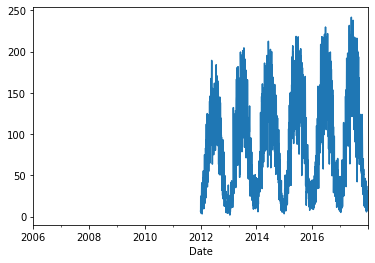

In [42]:
df_solar = df['Solar']

df_solar.plot()

Importiamo Seaborn e usiamo la funzione *set* per usare le sue impostazioni grafiche di default. È sufficiente fare questa operazione una sola volta, al momento dell'import.

**Nota**: se questo non dovesse aver effetto, eseguite nuovamente la cella con la funzione set.

In [43]:
import seaborn as sns
sns.set()

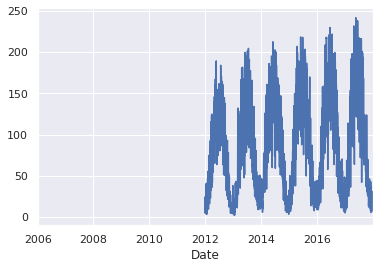

In [44]:
df_solar.plot()

Esempi di plot
---

La funzione plot accetta svariati argomenti opzionali.

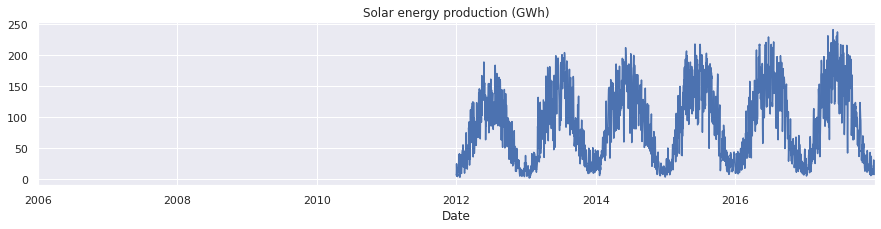

In [45]:
df_solar.plot(figsize=(15, 3), title='Solar energy production (GWh)')

Alcuni di questi sono proprietà ereditate da Matplotlib e non sono direttamente visibili nella documentazione. Qui troviamo una lista completa: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html

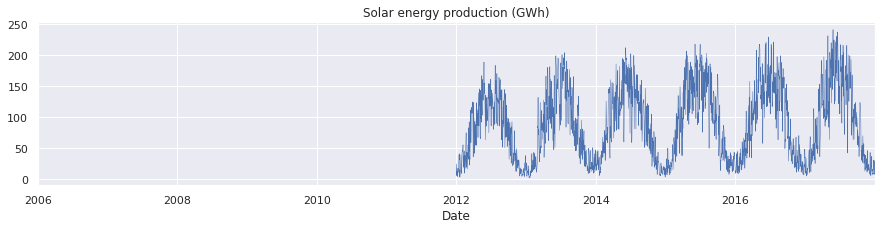

In [46]:
df_solar.plot(figsize=(15, 3), title='Solar energy production (GWh)', linewidth=.5)

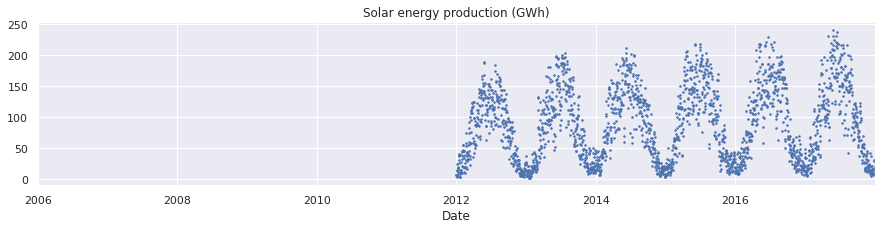

In [47]:
df_solar.plot(figsize=(15, 3),
              title='Solar energy production (GWh)',
              marker='.',
              markersize=3,
              linestyle='')

Notare come nei plot l'indicizzazione si adatti al livello di dettaglio dei dati.

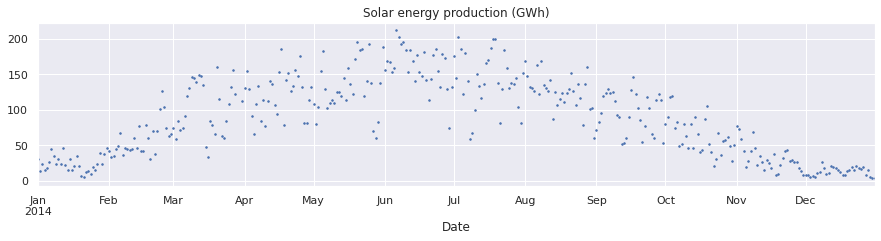

In [48]:
df_solar['2014'].plot(figsize=(15, 3),
                      title='Solar energy production (GWh)',
                      marker='.',
                      markersize=3,
                      linestyle='')

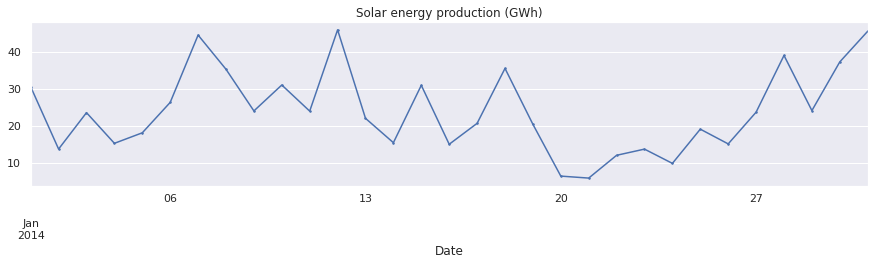

In [49]:
df_solar['2014-01'].plot(figsize=(15, 3),
                         title='Solar energy production (GWh)',
                         marker='.',
                         markersize=3,
                         linestyle='-')

Plot multipli
---

Proviamo a visualizzare contemporaneamente le produzioni eolica e solare.

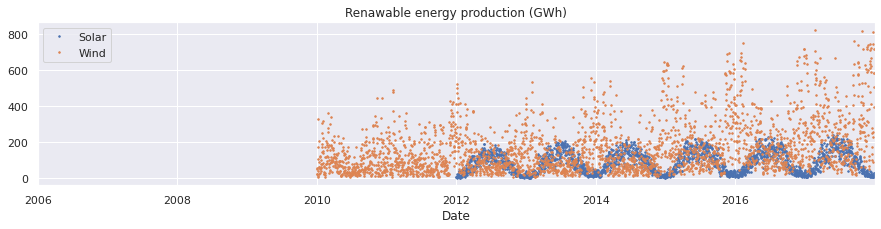

In [50]:
df_renewable = df[['Solar', 'Wind']]

df_renewable.plot(figsize=(15, 3),
                  title='Renawable energy production (GWh)',
                  marker='.',
                  markersize=3,
                  linestyle='')

L'argomento *subplots* crea un plot per ogni colonna del dataframe.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f72b9a6e1d0>,
      dtype=object)

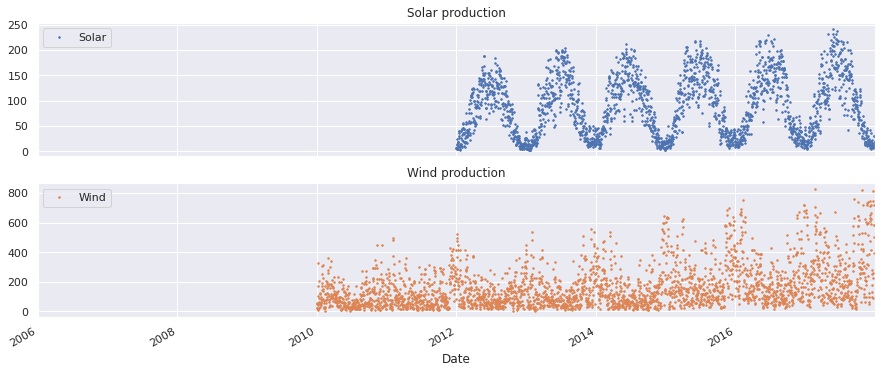

In [51]:
subplots = df_renewable.plot(figsize=(15, 6),
                             marker='.',
                             markersize=3,
                             linestyle='',
                             title=['Solar production', 'Wind production'],
                             subplots=True)

subplots

La funzione plot di Seaborn è una scorciatoia per quella omonima di Matplotlib. Per ottenere alcuni risultati grafici è preferibile utilizzare direttamente quest'ultima.

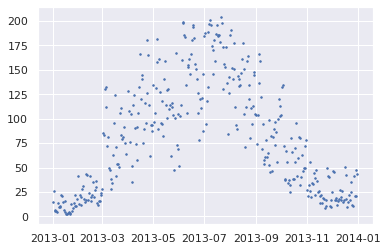

In [52]:
plt.plot(df['Solar']['2013'], linestyle='', marker='.', markersize=3)

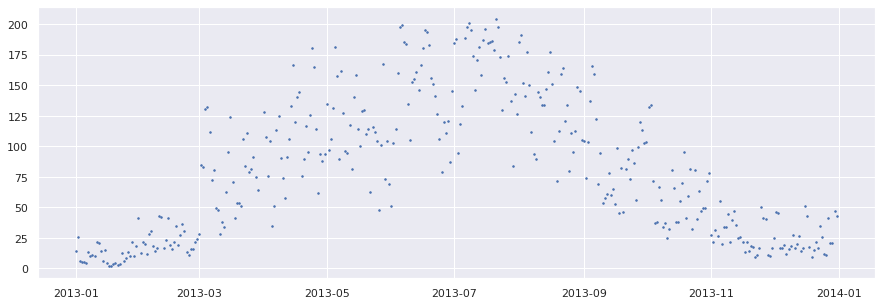

In [53]:
plt.figure(figsize=(15, 5))
plt.plot(df['Solar']['2013'], linestyle='', marker='.', markersize=3)

Supponiamo di voler visualizzare sullo stesso grafico anche la produzione eolica, ma con uno stile diverso.

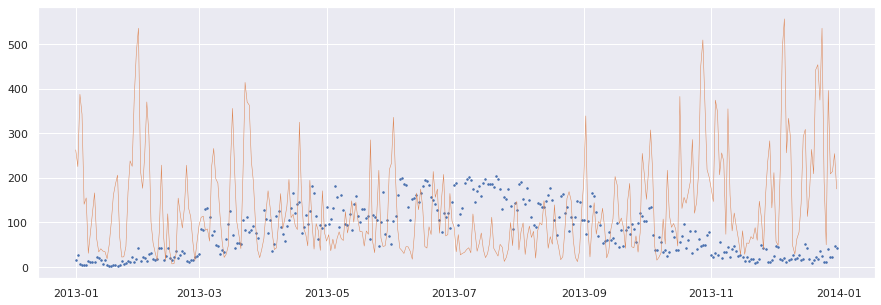

In [54]:
plt.figure(figsize=(15, 5))
plt.plot(df['Solar']['2013'], linestyle='', marker='.', markersize=3)
plt.plot(df['Wind']['2013'], linestyle='-', linewidth=0.5)

Personalizziamo ulteriormente il plot aggiungendo una legenda e un titolo.

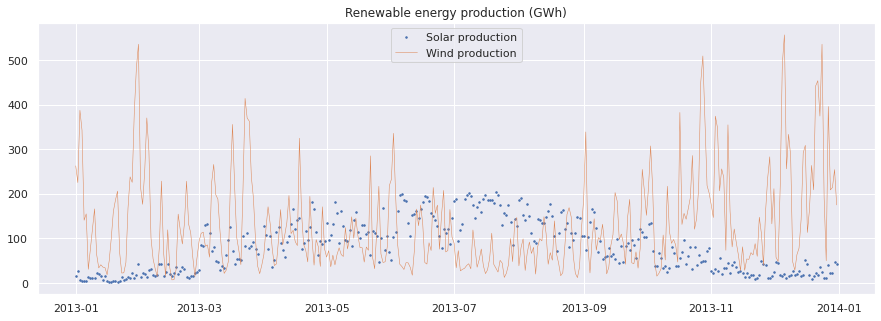

In [55]:
plt.figure(figsize=(15, 5))

plt.plot(df['Solar']['2013'], linestyle='', marker='.', markersize=3, label='Solar production')
plt.plot(df['Wind']['2013'], linestyle='-', linewidth=0.5, label='Wind production')
plt.title('Renewable energy production (GWh)')
plt.legend()

**Consiglio**: pensare ad ogni cella come a un ambiente grafico indipendente.

Ci vuole un po' a prendere confidenza con Matplotlib. Le buone notizie:

- ci si può fare praticamente tutto
- sul Web ci sono svariati di esempi di utilizzo.

Analisi della stagionalità
===

La tendenza di una variabile a ripetere periodicamente il suo comportamento nel tempo è detta *stagionalità*. 

Questa è chiara nella produzione di energia solare. In questo caso si tratta di una *stagionalità annuale*: ogni anno ritroviamo lo stesso comportamento, dovuto alla disponibilità di luce solare.

La stagionalità non è per forza meteorologica: pansate alle vendite sotto Natale.

Esercizio 1.2
---

Usare la funzione plot e gli strumenti Pandas visti finora per visualizzare il consumo di energia elettrica.

Che tipo di stagionalità ha questa variabile? Come si può interpretare?

---

**Recap**: abbiamo analizzato la stagionalità di una serie temporale con uno zoom su un certo periodo temporale.

Il nostro obiettivo adesso è rappresentare la stagionalità globale dell'intera serie.

*groupby*
---
Come sapete, la funzione *groupby* di Pandas permette di raggruppare i record in base a una o più proprietà e di estrarre statistiche da ciascun gruppo. Ci sono quindi tre ingredienti:

- le variabili in base alle quali formiamo i gruppi
- le variabili di cui vogliamo conoscere il comportamento all'interno dei gruppi
- le statistiche che estraiamo da queste ultime, gruppo per gruppo.

Utilizziamo groupby per analizzare la stagionalità annuale della produzione di energia solare.

In [56]:
df['Month'] = df.index.month_name()

df.head()

,Consumption,Wind,Solar,Month
Date,,,,
2006-01-01,1069.184,NaN,NaN,January
2006-01-02,1380.521,NaN,NaN,January
2006-01-03,1442.533,NaN,NaN,January
2006-01-04,1457.217,NaN,NaN,January
2006-01-05,1477.131,NaN,NaN,January


In [57]:
df.groupby('Month').mean()

,Consumption,Wind,Solar
Month,,,
April,1298.457644,148.644725,119.734933
August,1249.991327,109.350778,138.778575
December,1374.364568,277.566526,20.068538
February,1452.463841,206.942903,43.846735
January,1433.781435,207.716480,19.569602
July,1266.701788,112.376440,150.746720
June,1263.169508,114.812058,152.569494
March,1380.694497,174.218785,88.038121
May,1261.905065,129.161601,139.967312


In [58]:
df.groupby('Month', sort=False).mean()

,Consumption,Wind,Solar
Month,,,
January,1433.781435,207.716480,19.569602
February,1452.463841,206.942903,43.846735
March,1380.694497,174.218785,88.038121
April,1298.457644,148.644725,119.734933
May,1261.905065,129.161601,139.967312
June,1263.169508,114.812058,152.569494
July,1266.701788,112.376440,150.746720
August,1249.991327,109.350778,138.778575
September,1314.348716,127.731125,103.247256


In [59]:
df.groupby('Month', sort=False)['Solar'].mean()

Month
January       19.569602
February      43.846735
March         88.038121
April        119.734933
May          139.967312
June         152.569494
July         150.746720
August       138.778575
September    103.247256
October       61.328371
November      30.869122
December      20.068538
Name: Solar, dtype: float64

Quali sono in questo esempio i tre ingredienti di cui ho parlato poco fa?

Text(0.5, 1.0, 'Average monthly solar energy production (GWh)')

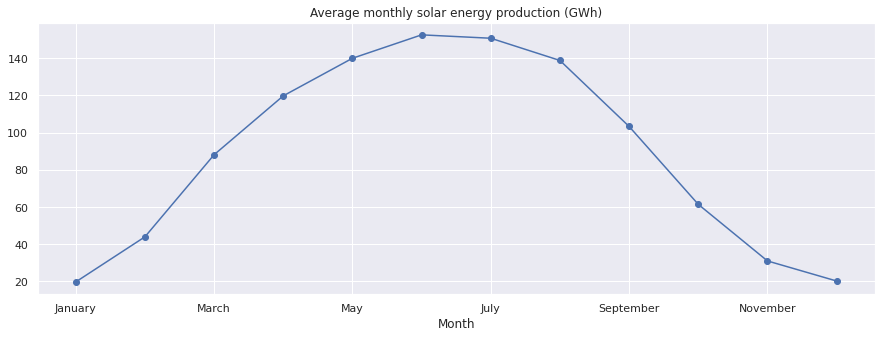

In [65]:
df.groupby('Month', sort=False)['Solar'].mean().plot(figsize=(15, 5), marker='o')
plt.title('Average monthly solar energy production (GWh)')

Boxplots
---

Un *boxplot* ha un contenuto informativo simile a quello di groupby, ma più ricco. Possiamo ottenerlo con la omonima funzione Seaborn.

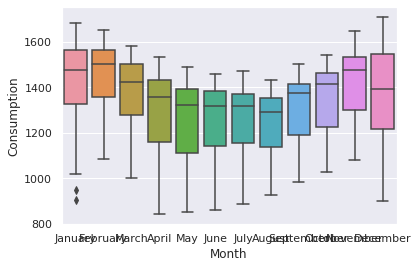

In [62]:
sns.boxplot('Month', 'Consumption', data=df)

Il risultato grafico non ci piace: dobbiamo cambiare la proprietà *figsize*. Questa non è però disponibile tra gli argomenti della funzione Seaborn, occorre passare da Matplotlib.

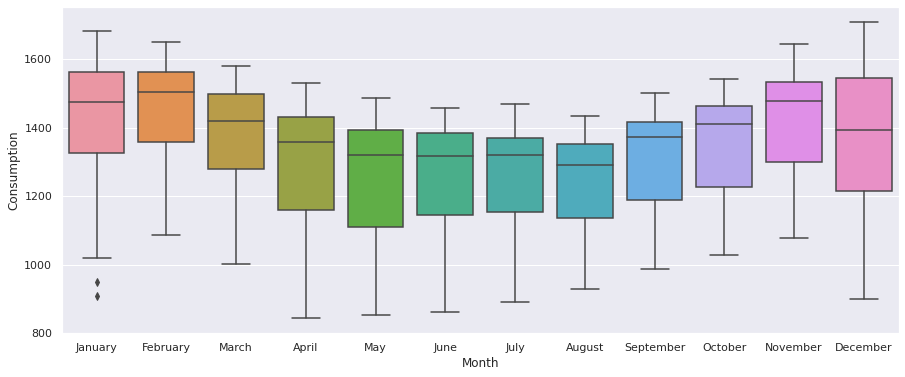

In [63]:
plt.figure(figsize=(15, 6))
sns.boxplot('Month', 'Consumption', data=df)

Esercizio 1.3
---
Analizzare la stagionalità settimanale del consumo di energia elettrica con le funzioni groupby (Pandas) e boxplot (Seaborn).

---

<script>
  $(document).ready(function(){
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('div.prompt').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by OVHCloud.
</footer>